In [23]:
import cv2
import numpy as np
import time
from matplotlib import pyplot as plt

# Returns line of pointing direction
def resolve_pointing_direction(scene_image):
    """Given scene image containing a pointing right hand, this function returns the line of pointing direction
    Argument:
    scene_image -- binary data of scene image containing pointing hand
    Return value:
    List containing coordinates representing a line corresponding to pointing direction 
    of the hand in the scene image
    """
#     protoFile = "hand/pose_deploy.prototxt"
#     weightsFile = "hand/pose_iter_102000.caffemodel"
#     nPoints = 22

#     #frame = cv2.imread("hand.jpg")

#     frameCopy = np.copy(scene_image)
#     frameWidth = scene_image.shape[1]
#     frameHeight = scene_image.shape[0]
#     aspect_ratio = frameWidth/frameHeight
#     threshold = 0.1

#     t = time.time()
#     # input image dimensions for the network
#     inHeight = 736
#     # inWidth = 368
#     inWidth = int(((aspect_ratio*inHeight)*8)//8)
#     net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

#     inpBlob = cv2.dnn.blobFromImage(frameCopy, 1.0 / 255, (inWidth, inHeight),
#                               (0, 0, 0), swapRB=False, crop=False)

#     net.setInput(inpBlob)

#     output = net.forward()
#     #print("time taken by network : {:.3f}".format(time.time() - t))


#     # Empty list to store the detected keypoints
#     points = []
    
#     for i in range(nPoints):
#         # confidence map of corresponding body's part.
#         probMap = output[0, i, :, :]
#         probMap = cv2.resize(probMap, (frameWidth, frameHeight))
    
#         # Find global maxima of the probMap.
#         minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
    
#         if prob > threshold :
#             cv2.circle(frameCopy, (int(point[0]), int(point[1])), 3, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
#             cv2.putText(frameCopy, "{}".format(i), (int(point[0]), int(point[1])), cv2.FONT_HERSHEY_SIMPLEX, .8, (0, 0, 255), 2, lineType=cv2.LINE_AA)
    
#             # Add the point to the list if the probability is greater than the threshold
#             points.append([int(point[0]), int(point[1])])
#         else :
#             points.append(None)
#     cv2.imwrite("test.jpg",frameCopy)
    
    
    img = np.copy(scene_image)
    # raw = frameCopy.copy()

    # img = raw.copy()
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

    upper = np.array([0, 0.35*255, 0])
    bottom = np.array([15, 0.75*255, 255])

    mask = cv2.inRange(img_hsv, upper, bottom)
    masked = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)
    blur = cv2.GaussianBlur(masked, (7, 7), 0)
    ret,thresh = cv2.threshold(blur,64,255,cv2.THRESH_BINARY)

    thresh = cv2.cvtColor(thresh, cv2.COLOR_BGR2GRAY);
    contours, hierarchy = cv2.findContours (thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    max_cnt = max (contours, key = lambda x: cv2.contourArea (x))
    cv2.drawContours(img, max_cnt, -1, (255,255,0), 2)

    M = cv2.moments(max_cnt)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    cv2.circle(img, (int(cX), int(cY)), 3, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
    cv2.putText(img, "centroid", (int(cX), int(cY)), cv2.FONT_HERSHEY_SIMPLEX, .8, (0, 0, 255), 2, lineType=cv2.LINE_AA)

    extTop = tuple(max_cnt[max_cnt[:, :, 1].argmin()][0])
    cv2.circle(img, extTop, 3, (255, 0, 0), -1, lineType=cv2.FILLED)
    cv2.putText(img, "top", extTop, cv2.FONT_HERSHEY_SIMPLEX, .8, (0, 0, 255), 2, lineType=cv2.LINE_AA)

    x_values = [extTop[0], cX]
    y_values = [extTop[1], cY]
    cv2.line(img, extTop, (cX, cY), 1, 3)

    plt.figure(figsize=(10,10))
    plt.imshow(img)
    plt.show()
    cv2.imwrite("test.jpg",img)

    x2, y2 = extTop
    x1, y1 = (cX, cY)
    '''
    TODO: You should implement code to get proper value of gradient and intercept 
    to replace assignments of mock values below.
    '''
    gradient=(y2-y1)/(x2-x1)
    intercept= y2 - gradient*(x2)
    
    return [gradient, intercept]

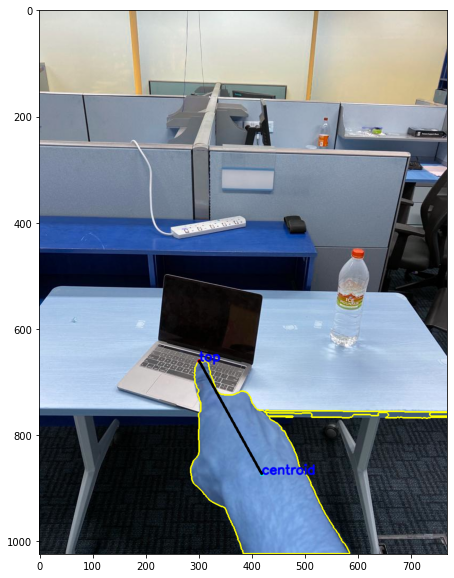

scene_image_train/scene_image_01.JPG : [1.805084745762712, 116.66949152542372]


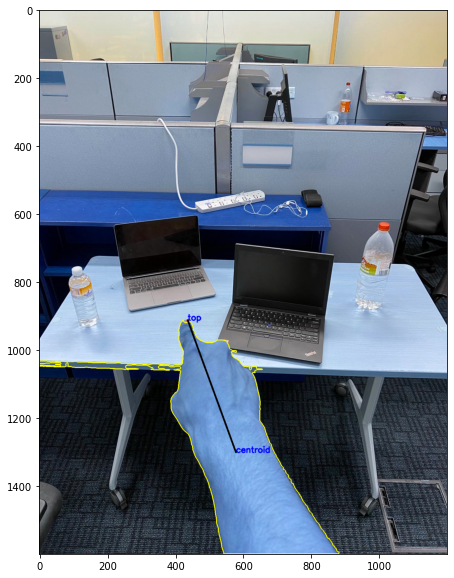

scene_image_train/scene_image_02.JPG : [2.73943661971831, -285.1338028169014]


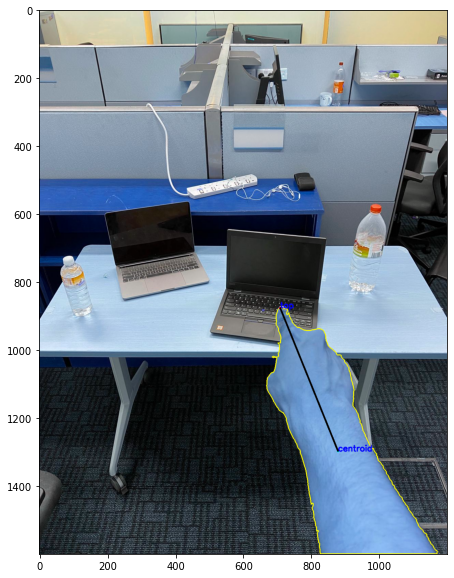

scene_image_train/scene_image_03.JPG : [2.476470588235294, -879.8176470588237]


In [25]:
for fname in ['scene_image_train/scene_image_01.JPG','scene_image_train/scene_image_02.JPG','scene_image_train/scene_image_03.JPG']:   
    try:
        frame = cv2.imread(fname)
        output = resolve_pointing_direction(frame)  
        print(f"{fname} : {str(output)}")
    except Exception as e:
        print(e)
        print(f"Unable to detect pointing direction for {fname}")

In [671]:
# import cv2
# import numpy as np
# import time
# from matplotlib import pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib import cm
# from matplotlib import colors


# # protoFile = "hand/pose_deploy.prototxt"
# # weightsFile = "hand/pose_iter_102000.caffemodel"
# # nPoints = 22

# scene_image = cv2.imread("scene_image_train/scene_image_10.JPG")
# # scene_image = cv2.cvtColor(scene_image, cv2.COLOR_BGR2RGB)

# #frame = cv2.imread("hand.jpg")

# # frameCopy = np.copy(scene_image)
# # raw = frameCopy.copy()
# # frameWidth = scene_image.shape[1]
# # frameHeight = scene_image.shape[0]
# # aspect_ratio = frameWidth/frameHeight
# # threshold = 0.1

# # t = time.time()
# # input image dimensions for the network
# # inHeight = 736
# # inWidth = 368
# # inWidth = int(((aspect_ratio*inHeight)*8)//8)
# # net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

# # inpBlob = cv2.dnn.blobFromImage(frameCopy, 1.0 / 255, (inWidth, inHeight),
# #                           (0, 0, 0), swapRB=False, crop=False)

# # net.setInput(inpBlob)

# # output = net.forward()
# #print("time taken by network : {:.3f}".format(time.time() - t))


# # Empty list to store the detected keypoints
# # points = []

# # for i in range(nPoints):
#     # confidence map of corresponding body's part.
# #     probMap = output[0, i, :, :]
# #     probMap = cv2.resize(probMap, (frameWidth, frameHeight))

#     # Find global maxima of the probMap.
# #     minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)

# #     if prob > threshold :
# #         cv2.circle(frameCopy, (int(point[0]), int(point[1])), 3, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
# #         cv2.putText(frameCopy, "{}".format(i), (int(point[0]), int(point[1])), cv2.FONT_HERSHEY_SIMPLEX, .8, (0, 0, 255), 2, lineType=cv2.LINE_AA)

#         # Add the point to the list if the probability is greater than the threshold
# #         points.append([int(point[0]), int(point[1]), int(i)])
# #     else :
# #         points.append(None)
# # cv2.imwrite("test.jpg",frameCopy)


# img = np.copy(scene_image)
# # raw = frameCopy.copy()

# # img = raw.copy()
# img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

# upper = np.array([0, 0.35*255, 0])
# bottom = np.array([15, 0.75*255, 255])

# mask = cv2.inRange(img_hsv, upper, bottom)
# masked = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)
# blur = cv2.GaussianBlur(masked, (7, 7), 0)
# ret,thresh = cv2.threshold(blur,64,255,cv2.THRESH_BINARY)

# thresh = cv2.cvtColor(thresh, cv2.COLOR_BGR2GRAY);
# contours, hierarchy = cv2.findContours (thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# max_cnt = max (contours, key = lambda x: cv2.contourArea (x))
# cv2.drawContours(img, max_cnt, -1, (255,255,0), 2)

# M = cv2.moments(max_cnt)
# cX = int(M["m10"] / M["m00"])
# cY = int(M["m01"] / M["m00"])
# cv2.circle(img, (int(cX), int(cY)), 3, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
# cv2.putText(img, "centroid", (int(cX), int(cY)), cv2.FONT_HERSHEY_SIMPLEX, .8, (0, 0, 255), 2, lineType=cv2.LINE_AA)

# extTop = tuple(max_cnt[max_cnt[:, :, 1].argmin()][0])
# cv2.circle(img, extTop, 3, (255, 0, 0), -1, lineType=cv2.FILLED)
# cv2.putText(img, "top", extTop, cv2.FONT_HERSHEY_SIMPLEX, .8, (0, 0, 255), 2, lineType=cv2.LINE_AA)


# x_values = [extTop[0], cX]
# y_values = [extTop[1], cY]

# cv2.line(img, extTop, (cX, cY), 1, 3)

# plt.figure(figsize=(10,10))
# plt.imshow(img)
# plt.show()

# x2, y2 = extTop
# x1, y1 = (cX, cY)

# # print(extTop)
# # print(y1, x1)


# '''
# TODO: You should implement code to get proper value of gradient and intercept 
# to replace assignments of mock values below.
# '''
# gradient=(y2-y1)/(x2-x1)
# intercept= y2 - gradient*(x2)

# print(gradient)
# print(intercept)


In [624]:
# plt.figure(figsize=(20,20))
# plt.imshow(frameCopy)
# plt.title('Result')
# plt.show()

In [664]:
# scene_image = cv2.imread("scene_image_train/scene_image_01.JPG")
# img = np.copy(scene_image)
# # raw = frameCopy.copy()

# # img = raw.copy()
# img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

# upper = np.array([0, 0.35*255, 0])
# bottom = np.array([15, 0.75*255, 255])

# mask = cv2.inRange(img_hsv, upper, bottom)
# masked = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)
# blur = cv2.GaussianBlur(masked, (7, 7), 0)
# ret,thresh = cv2.threshold(blur,64,255,cv2.THRESH_BINARY)

# thresh = cv2.cvtColor(thresh, cv2.COLOR_BGR2GRAY);
# contours, hierarchy = cv2.findContours (thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# max_cnt = max (contours, key = lambda x: cv2.contourArea (x))
# cv2.drawContours(img, max_cnt, -1, (255,255,0), 2)

# M = cv2.moments(max_cnt)
# cX = int(M["m10"] / M["m00"])
# cY = int(M["m01"] / M["m00"])
# cv2.circle(img, (int(cX), int(cY)), 3, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
# cv2.putText(img, "centroid", (int(cX), int(cY)), cv2.FONT_HERSHEY_SIMPLEX, .8, (0, 0, 255), 2, lineType=cv2.LINE_AA)

# extTop = tuple(max_cnt[max_cnt[:, :, 1].argmin()][0])
# cv2.circle(img, extTop, 3, (255, 0, 0), -1, lineType=cv2.FILLED)
# cv2.putText(img, "top", extTop, cv2.FONT_HERSHEY_SIMPLEX, .8, (0, 0, 255), 2, lineType=cv2.LINE_AA)




# cv2.line(img, extTop, (cX, cY), 1, 3)

# plt.figure(figsize=(10,10))
# plt.imshow(img)
# plt.show()

In [674]:
import numpy as np
from sklearn.linear_model import LinearRegression


x = np.array([x1,x2]).reshape((-1,1))
y = np.array([y1,y2]).reshape((-1,1))

model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [675]:
r_sq = model.score(x, y)

In [676]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)
print('r_sq:', r_sq)

intercept: [-793.12658228]
slope: [[2.91139241]]
r_sq: 1.0


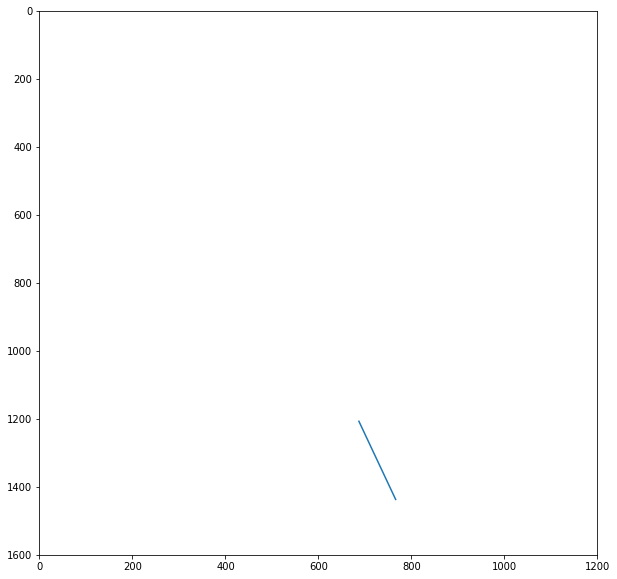

In [678]:
plt.figure(figsize=(10,10))
plt.plot(x,y)
plt.xlim([0, frameWidth])
plt.ylim([0, frameHeight])
plt.gca().invert_yaxis()
plt.show()

In [507]:
# img = raw.copy()
# img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

In [474]:
# upper = np.array([0, 0.35*255, 0])
# bottom = np.array([15, 0.75*255, 255])

# mask = cv2.inRange(img_hsv, upper, bottom)
# result = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)

# plt.figure(figsize=(10,10))
# plt.subplot(1, 2, 1)

# plt.imshow(mask, cmap="gray")
# plt.subplot(1, 2, 2)
# plt.imshow(result)
# plt.show()

In [475]:
# blur = cv2.GaussianBlur(result, (5, 5), 0)
# plt.figure(figsize=(10,10))
# plt.imshow(blur)
# plt.show()

In [476]:
# ret,thresh = cv2.threshold(blur,64,255,cv2.THRESH_BINARY)
# plt.figure(figsize=(10,10))
# plt.imshow(thresh)
# plt.show()

In [477]:
# thresh = cv2.cvtColor(thresh, cv2.COLOR_BGR2GRAY);
# contours, hierarchy = cv2.findContours (thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# max_cnt = max (contours, key = lambda x: cv2.contourArea (x))
# cv2.drawContours(thresh, max_cnt, -1, (255,255,0), 2)
# plt.figure(figsize=(10,10))
# plt.imshow(thresh)
# plt.show()

In [500]:
# cnt_centroid